In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project_Delbin/NF-UQ-NIDS.csv')

In [ ]:
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign,NF-UNSW-NB15
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign,NF-UNSW-NB15
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign,NF-UNSW-NB15
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign,NF-UNSW-NB15
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign,NF-UNSW-NB15


In [ ]:
data.drop(['Dataset'], inplace = True, axis = 1)

In [ ]:
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign


In [ ]:
data.shape

(11994893, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11994893 entries, 0 to 11994892
Data columns (total 14 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   IPV4_SRC_ADDR               object 
 1   L4_SRC_PORT                 int64  
 2   IPV4_DST_ADDR               object 
 3   L4_DST_PORT                 int64  
 4   PROTOCOL                    int64  
 5   L7_PROTO                    float64
 6   IN_BYTES                    int64  
 7   OUT_BYTES                   int64  
 8   IN_PKTS                     int64  
 9   OUT_PKTS                    int64  
 10  TCP_FLAGS                   int64  
 11  FLOW_DURATION_MILLISECONDS  int64  
 12  Label                       int64  
 13  Attack                      object 
dtypes: float64(1), int64(10), object(3)
memory usage: 1.3+ GB


In [ ]:
len(data["IPV4_SRC_ADDR"].unique())

75630

In [ ]:
data.describe()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
count,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07,1.199489e+07
mean,4.124519e+04,8.964758e+03,8.661742e+00,1.932050e+01,3.983727e+03,9.489449e+03,3.562578e+01,1.251652e+01,5.095628e+01,2.163429e+06,2.323360e-01
std,2.108654e+04,1.772082e+04,6.404263e+00,3.504857e+01,1.662256e+05,2.933544e+05,1.901997e+03,5.192708e+02,7.733605e+01,2.142507e+06,4.223221e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.299400e+04,5.300000e+01,6.000000e+00,0.000000e+00,6.800000e+01,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,5.061000e+04,4.430000e+02,6.000000e+00,0.000000e+00,2.320000e+02,1.560000e+02,4.000000e+00,2.000000e+00,2.400000e+01,4.178245e+06,0.000000e+00
75%,5.581700e+04,3.389000e+03,6.000000e+00,7.000000e+00,1.440000e+03,1.873000e+03,9.000000e+00,7.000000e+00,2.700000e+01,4.294858e+06,0.000000e+00
max,6.553500e+04,6.553500e+04,2.550000e+02,2.510000e+02,2.282235e+08,2.432197e+08,1.221043e+06,1.349068e+06,2.230000e+02,4.294967e+06,1.000000e+00


In [ ]:
data['Attack'].value_counts()

Attack
Benign            9208048
DDoS               763285
Reconnaissance     482946
injection          468575
DoS                348962
Brute Force        291955
password           156299
xss                 99944
Infilteration       62072
Exploits            24736
scanning            21467
Fuzzers             19463
Backdoor            19029
Bot                 15683
Generic              5570
Analysis             1995
Theft                1909
Shellcode            1365
mitm                 1295
Worms                 153
ransomware            142
Name: count, dtype: int64

In [ ]:
data['Label'].value_counts()

Label
0    9208048
1    2786845
Name: count, dtype: int64

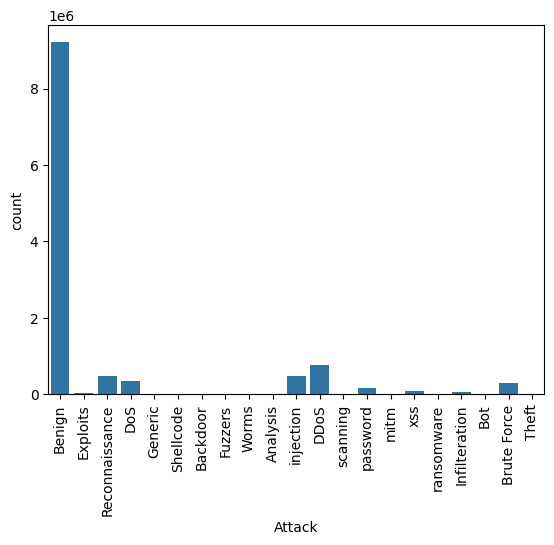

In [ ]:
sns.countplot(x = 'Attack', data = data)
plt.xticks(rotation = 90)
plt.show()

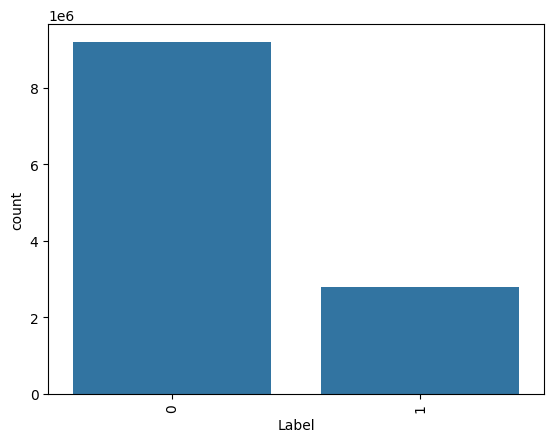

In [ ]:
sns.countplot(x = 'Label', data = data)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data.drop(["Label"], inplace = True, axis = 1)

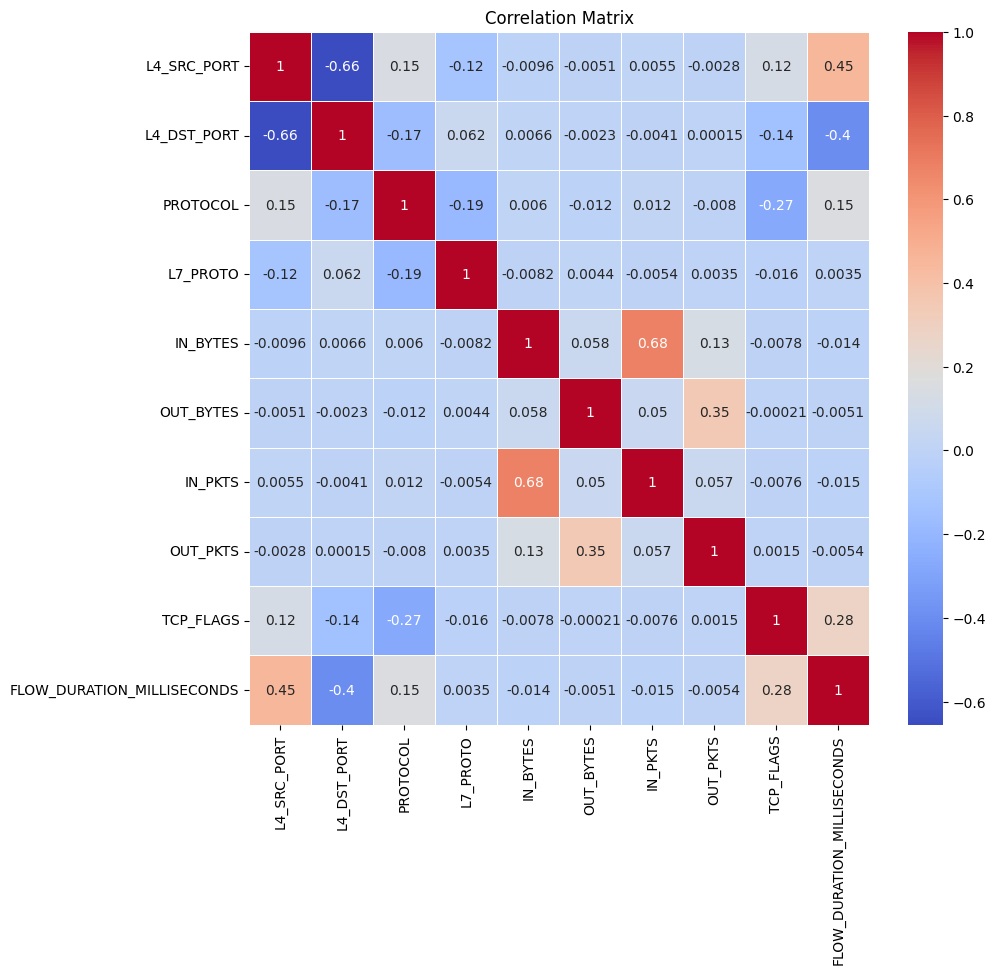

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the IPV4_SRC_ADDR and IPV4_DST_ADDR columns
data['IPV4_SRC_ADDR'] = le.fit_transform(data['IPV4_SRC_ADDR'])
data['IPV4_DST_ADDR'] = le.fit_transform(data['IPV4_DST_ADDR'])

# Print the encoded data
data.head()


,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Attack
0,18035,62073,25333,56082,6,0.0,9672,416,11,8,25,15,Benign
1,18047,32284,25333,1526,6,0.0,1776,104,6,2,25,0,Benign
2,18035,21,25329,21971,6,1.0,1842,1236,26,22,25,1111,Benign
3,64615,23800,5246,46893,6,0.0,528,8824,10,12,27,124,Benign
4,64619,63062,5258,21,6,1.0,1786,2340,32,34,25,1459,Benign


In [ ]:
X = data.drop('Attack', axis=1)
y = data['Attack']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [ ]:
# Train the multi-class logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# prompt: I want to fit a decision tree classifier on the data as well

from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fit the classifier to the training data
clf = clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_dt = clf.predict(X_test)

# Evaluate the accuracy of the decision tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
